In [93]:
import pandas as pd 
import numpy as np

In [94]:
master_frame1=pd.read_csv(r"data/master_frame1.csv")

## checkpoint-2

###### Q1-Average funding amount of venture?

In [95]:
round(master_frame1.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False),2)

funding_round_type
private_equity    73938486.28
venture           11724222.69
angel               971573.89
seed                747793.68
Name: raised_amount_usd, dtype: float64

In [96]:
venture_avg=master_frame1[master_frame1.funding_round_type=='venture']


In [97]:
venture_avg.raised_amount_usd.mean()

11724222.690204773

##### Q2-Average funding amount of angel type?

In [98]:
angel_avg=master_frame1[master_frame1.funding_round_type=='angel']

In [99]:
angel_avg.raised_amount_usd.mean()

971573.8911363636

##### Q3-Average funding amount of seed type?

In [100]:
seed_avg=master_frame1[master_frame1.funding_round_type=='seed']

In [101]:
seed_avg.raised_amount_usd.mean()

747793.6824840009

##### Q4-Average funding amount of private equity type?

In [102]:
private_equity_avg=master_frame1[master_frame1.funding_round_type=='private_equity']

In [103]:
private_equity_avg.raised_amount_usd.mean()

73938486.27527472

##### Q5-Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [104]:
master_frame1.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,fame,Media,IND,venture,10000000.0
1,qounter,Application Platforms,USA,seed,700000.0
2,0-6-com,Curated Web,CHN,venture,2000000.0
3,0ndine-biomedical-inc,Biotechnology,CAN,seed,43360.0
4,0ndine-biomedical-inc,Biotechnology,CAN,venture,719491.0


In [105]:
round(master_frame1.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False),2)

funding_round_type
private_equity    73938486.28
venture           11724222.69
angel               971573.89
seed                747793.68
Name: raised_amount_usd, dtype: float64

##### we can see the venture funding is b/w 5m-15m

In [106]:
venture_avg.to_csv(r'data/venture_avg.csv',index=False)

In [107]:
venture_avg.head(10)

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,fame,Media,IND,venture,10000000.0
2,0-6-com,Curated Web,CHN,venture,2000000.0
4,0ndine-biomedical-inc,Biotechnology,CAN,venture,719491.0
6,0xdata,Analytics,USA,venture,20000000.0
7,0xdata,Analytics,USA,venture,1700000.0
8,0xdata,Analytics,USA,venture,8900000.0
13,1-mainstream,Apps,USA,venture,5000000.0
14,10-minutes-with,Education,GBR,venture,4000000.0
18,1000memories,Curated Web,USA,venture,2520000.0
20,1000museums-com,Curated Web,USA,venture,265940.0


# fetching the data on wikipedia

In [108]:
english_lang = pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")

In [109]:
t1=english_lang[0]  #select the first table
t1

,Nr,Country,Alpha-3 code,Region,Population,Primary language?
0,1,Australia,AUS,Oceania,25019600,Yes
1,2,New Zealand[1],NZL,Oceania,4893830,Yes
2,3,United Kingdom,GBR,Europe,66040229,Yes
3,4,United States,USA,North America/Oceania,328239523,Yes


In [110]:
t2 = english_lang[1] #select the second table
t2.head()

,Nr,Country,Alpha-3 code,Region,Population1,Primary language?
0,1,Antigua and Barbuda[2],ATG,Caribbean,85000,Yes
1,2,Bahamas[2],BHS,Caribbean,331000,Yes
2,3,Barbados[3],BRB,Caribbean,294000,Yes
3,4,Belize[4],BLZ,Central America,288000,Yes
4,5,Botswana[4],BWA,Africa,1882000,No


In [111]:
t1=t1[['Alpha-3 code','Primary language?']] #contain only alpha-2 code or primary language in t1 dataframe

In [112]:
t2 = t2[['Alpha-3 code','Primary language?']] #contain only alpha-2 code or primary language in t2 dataframe

In [113]:
eng_lang = pd.concat([t1,t2],axis=0) #concatinating both dataframes because both dataframes columns are similar

In [114]:
eng_lang=eng_lang.reset_index(drop=True)  

In [115]:
eng_lang['Primary language?'] = eng_lang['Primary language?'].apply(lambda x:x.split()[0]) #splitting and contain 0 index value

In [116]:
eng_lang.head(10)

,Alpha-3 code,Primary language?
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes
5,BHS,Yes
6,BRB,Yes
7,BLZ,Yes
8,BWA,No
9,BDI,No


In [117]:
eng_lang.rename(columns={'Alpha-3 code':'country_code','Primary language?':'English_Langauge'},inplace=True) 

In [118]:
len(eng_lang.country_code)

58

In [119]:
master_frame2=pd.merge(eng_lang,venture_avg,how='inner',on='country_code')

In [120]:
master_frame2.head()

,country_code,English_Langauge,permalink,category_list,funding_round_type,raised_amount_usd
0,AUS,Yes,adalta,Biotechnology,venture,3007428.0
1,AUS,Yes,affiniti,Digital Media,venture,574438.0
2,AUS,Yes,agworld-pty-ltd,Software,venture,5563540.0
3,AUS,Yes,agworld-pty-ltd,Software,venture,1415094.0
4,AUS,Yes,agworld-pty-ltd,Software,venture,4140987.0


In [121]:
master_frame2.shape

(40824, 6)

In [122]:
master_frame2.drop('English_Langauge',axis=1,inplace=True)

In [123]:
master_frame2.to_csv(r"data/master_frame2.csv",index=False)

In [124]:
total_funding=master_frame2.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)/1000000
total_funding

country_code
USA    420068.029342
GBR     20072.813004
IND     14261.508718
CAN      9482.217668
SGP      2793.917856
IRL      1669.285543
AUS      1319.028698
NZL       448.316383
ZAF       233.713106
Name: raised_amount_usd, dtype: float64

In [125]:
top3=master_frame2[master_frame2['country_code'].isin(['USA','GBR','IND'])]
top3.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd
253,GBR,10-minutes-with,Education,venture,4000000.0
254,GBR,31dover,E-Commerce,venture,2274716.0
255,GBR,365scores,Android,venture,5500000.0
256,GBR,365scores,Android,venture,1200000.0
257,GBR,3sun,Clean Technology,venture,15152514.0


In [126]:
top9=pd.DataFrame(data=total_funding)
top9

,raised_amount_usd
country_code,
USA,420068.029342
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
SGP,2793.917856
IRL,1669.285543
AUS,1319.028698
NZL,448.316383
ZAF,233.713106


In [127]:
top9.head(3)

,raised_amount_usd
country_code,
USA,420068.029342
GBR,20072.813004
IND,14261.508718


## sector analysis

In [128]:
mapping=pd.read_csv("data/mapping.csv")

In [129]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [130]:
# create a function to checking all the nan values entire datasets

def nan_perc(master_frame):
    return round((100*master_frame.isnull().sum())/len(master_frame),2)

In [131]:
nan_perc(mapping)

category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

In [132]:
mapping.dropna(subset=['category_list'],inplace=True)

In [133]:
nan_perc(mapping)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [134]:
mapping.category_list.nunique()

687

In [135]:
mapping["category_list"]=mapping["category_list"].apply(lambda x:x.split("|")[0])

In [136]:
mapping["category_list"]=mapping["category_list"].apply(lambda x:x.replace("0","na"))

In [137]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [138]:
mapping=pd.melt(mapping,id_vars=['category_list'],var_name=['main_sector'])

In [139]:
mapping.head(18)

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [140]:
mapping.shape

(6183, 3)

In [141]:
mapping=mapping[mapping.value!=0]

In [142]:
mapping.head()

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [143]:
mapping.reset_index(drop=True,inplace=True)

In [144]:
mapping.head()

,category_list,main_sector,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1


In [145]:
mapping.drop('value',axis=1,inplace=True) #drop value in the mappling df

## checkpoint-5

In [146]:
top3.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd
253,GBR,10-minutes-with,Education,venture,4000000.0
254,GBR,31dover,E-Commerce,venture,2274716.0
255,GBR,365scores,Android,venture,5500000.0
256,GBR,365scores,Android,venture,1200000.0
257,GBR,3sun,Clean Technology,venture,15152514.0


In [147]:
master_frame3=pd.merge(top3,mapping,how='inner',on='category_list')

In [148]:
master_frame3.country_code.unique()

array(['GBR', 'USA', 'IND'], dtype=object)

In [149]:
nan_perc(master_frame3)

country_code          0.0
permalink             0.0
category_list         0.0
funding_round_type    0.0
raised_amount_usd     0.0
main_sector           0.0
dtype: float64

In [150]:
master_frame3

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector
0,GBR,10-minutes-with,Education,venture,4000000.0,Others
1,GBR,brainbow,Education,venture,7000000.0,Others
2,GBR,digital-assess,Education,venture,3000000.0,Others
3,GBR,fuse-universal,Education,venture,10000000.0,Others
4,GBR,guroo,Education,venture,759353.0,Others
...,...,...,...,...,...,...
38633,IND,holidayiq-com,Resorts,venture,15000000.0,Entertainment
38634,IND,holidayiq-com,Resorts,venture,5000000.0,Entertainment
38635,IND,mettl-com,Skill Assessment,venture,4000000.0,Others
38636,IND,revx,Mobile Advertising,venture,4000000.0,"Social, Finance, Analytics, Advertising"


In [151]:
d1=pd.DataFrame(master_frame3[(master_frame3['raised_amount_usd']>=5000000.0) & (master_frame3['raised_amount_usd']<=15000000.0) & (master_frame3['country_code']==top9.index[0])])
d2=pd.DataFrame(master_frame3[(master_frame3['raised_amount_usd']>=5000000.0) & (master_frame3['raised_amount_usd']<=15000000.0) & (master_frame3['country_code']==top9.index[1])])
d3=pd.DataFrame(master_frame3[(master_frame3['raised_amount_usd']>=5000000.0) & (master_frame3['raised_amount_usd']<=15000000.0) & (master_frame3['country_code']==top9.index[2])])

In [152]:
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_count = pd.DataFrame(d1_group['raised_amount_usd'].count())
d1_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d1_count

,main_sector,count_of_investment
0,Automotive & Sports,167
1,Cleantech / Semiconductors,2300
2,Entertainment,591
3,Health,909
4,Manufacturing,799
5,"News, Search and Messaging",1582
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714


In [153]:
d1=pd.merge(d1,d1_count,left_on='main_sector',right_on='main_sector')
d1.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment
0,USA,17zuoye,Education,venture,5000000.0,Others,2950
1,USA,17zuoye,Education,venture,10000000.0,Others,2950
2,USA,5min,Education,venture,5000000.0,Others,2950
3,USA,5min,Education,venture,7500000.0,Others,2950
4,USA,altierre,Education,venture,13000000.0,Others,2950


In [154]:
#The total amount invested in each main sector for USA
d1_group = d1.groupby(by='main_sector',as_index=False)
d1_sum = pd.DataFrame(d1_group['raised_amount_usd'].sum())
d1_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d1_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,1454104361.0
1,Cleantech / Semiconductors,21206628192.0
2,Entertainment,5099197982.0
3,Health,8211859357.0
4,Manufacturing,7258553378.0
5,"News, Search and Messaging",13959567428.0
6,Others,26321007002.0
7,"Social, Finance, Analytics, Advertising",23807376964.0


In [155]:

#merge both frames 
d1=pd.merge(d1,d1_sum,left_on='main_sector',right_on='main_sector')
d1

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,USA,17zuoye,Education,venture,5000000.0,Others,2950,26321007002.0
1,USA,17zuoye,Education,venture,10000000.0,Others,2950,26321007002.0
2,USA,5min,Education,venture,5000000.0,Others,2950,26321007002.0
3,USA,5min,Education,venture,7500000.0,Others,2950,26321007002.0
4,USA,altierre,Education,venture,13000000.0,Others,2950,26321007002.0
...,...,...,...,...,...,...,...,...
12007,USA,vandyne-superturbo,Auto,venture,15000000.0,Automotive & Sports,167,1454104361.0
12008,USA,clean-wave-technologies,Electric Vehicles,venture,8762152.0,Automotive & Sports,167,1454104361.0
12009,USA,venture-vehicles-inc,Electric Vehicles,venture,6000000.0,Automotive & Sports,167,1454104361.0
12010,USA,isopur-fluid-technologies,Heavy Industry,venture,8000000.0,Automotive & Sports,167,1454104361.0


In [156]:
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_count = pd.DataFrame(d2_group['raised_amount_usd'].count())
d2_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d2_count

,main_sector,count_of_investment
0,Automotive & Sports,16
1,Cleantech / Semiconductors,128
2,Entertainment,56
3,Health,24
4,Manufacturing,42
5,"News, Search and Messaging",73
6,Others,147
7,"Social, Finance, Analytics, Advertising",133


In [157]:
d2=pd.merge(d2,d2_count,left_on='main_sector',right_on='main_sector')
d2.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment
0,GBR,brainbow,Education,venture,7000000.0,Others,147
1,GBR,fuse-universal,Education,venture,10000000.0,Others,147
2,GBR,medikidz,Education,venture,5055753.0,Others,147
3,GBR,acs-clothing,E-Commerce,venture,13359377.0,Others,147
4,GBR,acs-clothing,E-Commerce,venture,12879637.0,Others,147


In [158]:
#The total amount invested in each main sector for G.B.R.
d2_group = d2.groupby(by='main_sector',as_index=False)
d2_sum = pd.DataFrame(d2_group['raised_amount_usd'].sum())
d2_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d2_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,167051565.0
1,Cleantech / Semiconductors,1150139665.0
2,Entertainment,482784687.0
3,Health,214537510.0
4,Manufacturing,361940335.0
5,"News, Search and Messaging",615746235.0
6,Others,1283624289.0
7,"Social, Finance, Analytics, Advertising",1089404014.0


In [159]:
d2=pd.merge(d2,d2_sum,left_on='main_sector',right_on='main_sector')
d2.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,GBR,brainbow,Education,venture,7000000.0,Others,147,1283624289.0
1,GBR,fuse-universal,Education,venture,10000000.0,Others,147,1283624289.0
2,GBR,medikidz,Education,venture,5055753.0,Others,147,1283624289.0
3,GBR,acs-clothing,E-Commerce,venture,13359377.0,Others,147,1283624289.0
4,GBR,acs-clothing,E-Commerce,venture,12879637.0,Others,147,1283624289.0


In [160]:
#The total number (or count) of investments for each main sector for IND.
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_count = pd.DataFrame(d3_group['raised_amount_usd'].count())
d3_count.rename(columns={'raised_amount_usd':'count_of_investment'},inplace=True)
d3_count

,main_sector,count_of_investment
0,Automotive & Sports,13
1,Cleantech / Semiconductors,20
2,Entertainment,33
3,Health,19
4,Manufacturing,21
5,"News, Search and Messaging",52
6,Others,110
7,"Social, Finance, Analytics, Advertising",60


In [161]:
d3=pd.merge(d3,d3_count,left_on='main_sector',right_on='main_sector')
d3.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment
0,IND,hippocampus-learning-centres,Education,venture,13000000.0,Others,110
1,IND,hippocampus-learning-centres,Education,venture,5000000.0,Others,110
2,IND,iprof-learning-solutions,Education,venture,9000000.0,Others,110
3,IND,iprof-learning-solutions,Education,venture,6000000.0,Others,110
4,IND,maharana-infrastructure-and-professional-servi...,Education,venture,13300000.0,Others,110


In [162]:

#The total amount invested in each main sector for IND
d3_group = d3.groupby(by='main_sector',as_index=False)
d3_sum = pd.DataFrame(d3_group['raised_amount_usd'].sum())
d3_sum.rename(columns={'raised_amount_usd':'total_amount_of_investment'},inplace=True)
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].apply(lambda x: '{:.1f}'.format(x))
d3_sum

,main_sector,total_amount_of_investment
0,Automotive & Sports,136900000.0
1,Cleantech / Semiconductors,165380000.0
2,Entertainment,280830000.0
3,Health,167740000.0
4,Manufacturing,200900000.0
5,"News, Search and Messaging",433834545.0
6,Others,1013409507.0
7,"Social, Finance, Analytics, Advertising",550549550.0


In [163]:
d3=pd.merge(d3,d3_sum,left_on='main_sector',right_on='main_sector')
d3.head()

,country_code,permalink,category_list,funding_round_type,raised_amount_usd,main_sector,count_of_investment,total_amount_of_investment
0,IND,hippocampus-learning-centres,Education,venture,13000000.0,Others,110,1013409507.0
1,IND,hippocampus-learning-centres,Education,venture,5000000.0,Others,110,1013409507.0
2,IND,iprof-learning-solutions,Education,venture,9000000.0,Others,110,1013409507.0
3,IND,iprof-learning-solutions,Education,venture,6000000.0,Others,110,1013409507.0
4,IND,maharana-infrastructure-and-professional-servi...,Education,venture,13300000.0,Others,110,1013409507.0


##### Q1-Total number of Investments (count) 

In [164]:
d1_count['count_of_investment'].sum() #USA

12012

In [165]:
d2_count['count_of_investment'].sum() #GBR

619

In [166]:
d3_count['count_of_investment'].sum()  #IND

328

##### Q2-Total amount of investment (USD)

In [167]:
# USA
d1_sum['total_amount_of_investment']=d1_sum['total_amount_of_investment'].astype(dtype=np.float)
d1_sum['total_amount_of_investment'].sum()

107318294664.0

In [168]:
# GBR
d2_sum['total_amount_of_investment']=d2_sum['total_amount_of_investment'].astype(dtype=np.float)
d2_sum['total_amount_of_investment'].sum()

5365228300.0

In [169]:
# IND
d3_sum['total_amount_of_investment']=d3_sum['total_amount_of_investment'].astype(dtype=np.float)
d3_sum['total_amount_of_investment'].sum()

2949543602.0

##### Q3-Top Sector name (no. of investment-wise)

In [170]:
usa_top3=d1_count.sort_values(by='count_of_investment',ascending=False).head(3)   #USA
usa_top3

,main_sector,count_of_investment
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714
1,Cleantech / Semiconductors,2300


In [171]:
gbr_top3=d2_count.sort_values(by='count_of_investment',ascending=False).head(3)  #GBR
gbr_top3

,main_sector,count_of_investment
6,Others,147
7,"Social, Finance, Analytics, Advertising",133
1,Cleantech / Semiconductors,128


In [172]:
ind_top3=d3_count.sort_values(by='count_of_investment',ascending=False).head(3)  #IND
ind_top3

,main_sector,count_of_investment
6,Others,110
7,"Social, Finance, Analytics, Advertising",60
5,"News, Search and Messaging",52



##### For the top sector count-wise , which company received the highest investment?

In [173]:
d1[d1['main_sector']=='Others'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)  #USA

,raised_amount_usd,count_of_investment
permalink,,
virtustream,64300000.0,17700


In [174]:
d2[d2['main_sector']=='Others'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1) #GBR

,raised_amount_usd,count_of_investment
permalink,,
electric-cloud,37000000.0,588


In [175]:
d3[d3['main_sector']=='Others'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1) #IND

,raised_amount_usd,count_of_investment
permalink,,
firstcry-com,39000000.0,330


##### For the second-best sector count-wise, which company received the highest investment?

In [176]:
#USA

d1[d1['main_sector']=='Cleantech / Semiconductors'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
permalink,,
biodesix,75300000.0,18400


In [177]:
#GBR

d2[d2['main_sector']=='Cleantech / Semiconductors'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
permalink,,
eusa-pharma,35600000.0,384


In [178]:
#IND

d3[d3['main_sector']=='Cleantech / Semiconductors'].groupby(by='permalink').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,count_of_investment
permalink,,
azure-power,47200000.0,80


## Data Visuliaztions

In [179]:
import seaborn as sb
from matplotlib import pyplot as plt

In [180]:
#plot for total investment

master_group_plot=master_frame1.groupby(by='funding_round_type')
df_plot1 = pd.DataFrame(master_group_plot['raised_amount_usd'].sum())

sum_plot_df = pd.DataFrame(round(100*(df_plot1['raised_amount_usd'])/sum(df_plot1['raised_amount_usd']),2))
sum_plot_df

,raised_amount_usd
funding_round_type,
angel,0.60
private_equity,18.82
seed,2.21
venture,78.38


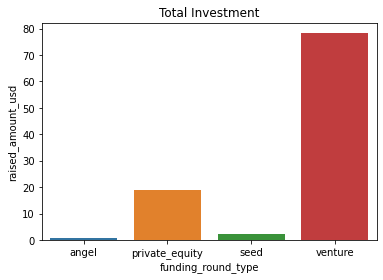

In [181]:
plot1 = sb.barplot(x=sum_plot_df.index,y='raised_amount_usd',data=sum_plot_df)
plot1.set(title='Total Investment')
plt.show()

In [182]:
# for AVG of all funding round type

df_plot2 = pd.DataFrame(master_group_plot['raised_amount_usd'].mean())

AVG_plot_df = pd.DataFrame(round(100*(df_plot2['raised_amount_usd'])/sum(df_plot2['raised_amount_usd']),2))
AVG_plot_df

,raised_amount_usd
funding_round_type,
angel,1.11
private_equity,84.62
seed,0.86
venture,13.42


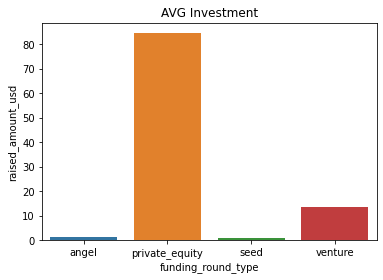

In [183]:
plot2 = sb.barplot(x=sum_plot_df.index,y='raised_amount_usd',data=AVG_plot_df)
plot2.set(title='AVG Investment')
plt.show()

##### showing  top 9 countries against the total amount of investments of funding type .

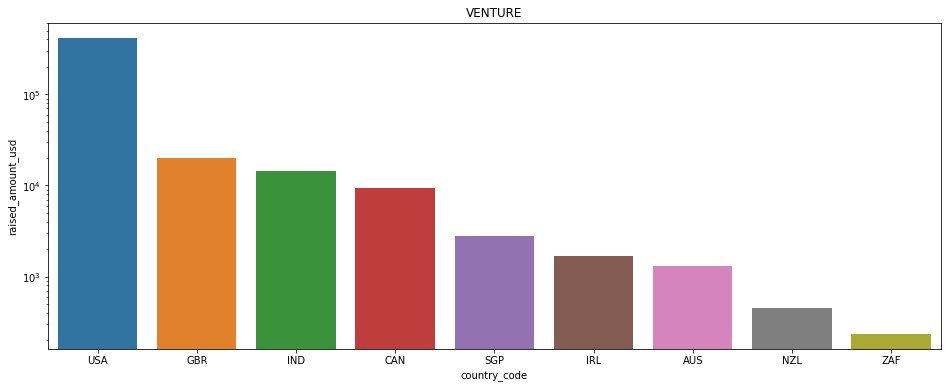

In [186]:
plt.figure(figsize=(16,6))
top9['raised_amount_usd'] = top9['raised_amount_usd'].astype(np.float64)
plot3 = sb.barplot(x=top9.index, y="raised_amount_usd",data=top9)
plot3.set(title='VENTURE')
plt.yscale('log')
plt.show()

##### top 3 sectors of the top 3 countries¶

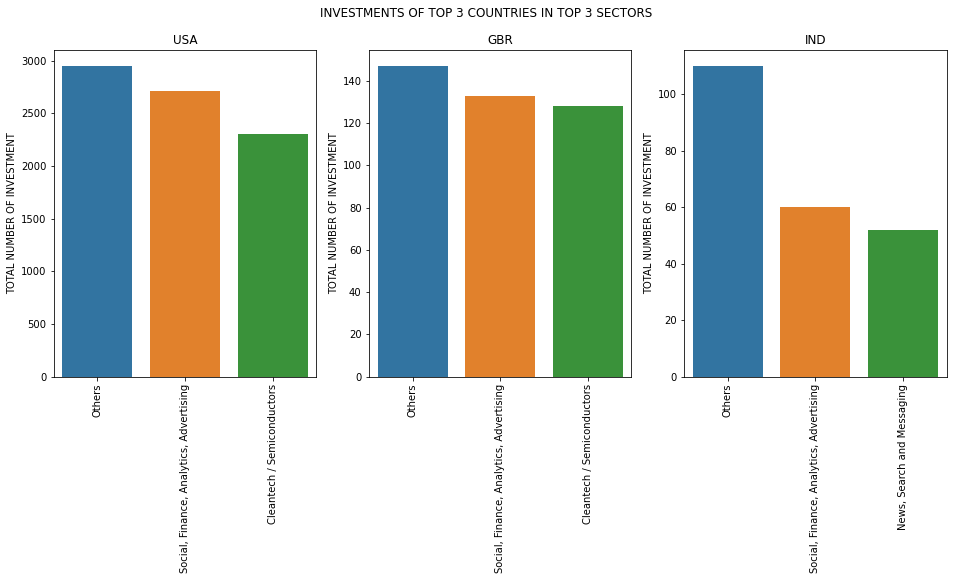

In [187]:
plt.figure(figsize=(16,6))
plt.subplot(1, 3, 1)
plot4=sb.countplot(x="main_sector",data=d1[d1['main_sector'].isin(usa_top3['main_sector'])])
plot4.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='USA')
plt.xticks(rotation=90)
plt.subplot(1, 3, 2)
plot5=sb.countplot(x="main_sector",data=d2[d2['main_sector'].isin(gbr_top3['main_sector'])])
plot5.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='GBR')
plt.xticks(rotation=90)
plt.subplot(1, 3, 3)
plot6 = sb.countplot(x="main_sector",data=d3[d3['main_sector'].isin(ind_top3['main_sector'])])
plot6.set(xlabel='', ylabel='TOTAL NUMBER OF INVESTMENT',title='IND')
plt.suptitle("INVESTMENTS OF TOP 3 COUNTRIES IN TOP 3 SECTORS")
plt.xticks(rotation=90)
plt.show()